In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # 가설검정 기능 여기 다 있다!

plt.style.use('ggplot')

# 1. 데이터 선택

- Kaggle Online Retail Dataset

- 영국 기반 온라인 리테일 거래 데이터 (2010~2011년), 고객 ID, 제품, 수량, 가격, 국가 등 포함

# 2. 데이터 전처리

- 결측치 확인 및 제거 (CustomerID 없음 → 제외 or 다른 처리)

- 이상치 처리 (수량 음수값 → 반품으로 분류)

- 새로운 변수 생성 = 매출액 = 수량 × 단가

In [5]:
# 데이터 불러오기
df = pd.read_excel("../data/Online Retail.xlsx")

In [6]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
df.shape

(541909, 8)

In [ ]:
# 결측치 몇개 있는지 확인
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# 결측치 처리 -> 제거 or 대체 (CustomerID 없는 경우 제외)]
# 원칙적으로는 결측치가 있으면 머신러닝이 안 돌아감.
# 나는 'Description'은 사용하지 않을 것이니 'CustomerID'만 처리하면 되겠다.
df = df.dropna(subset=["CustomerID"])

In [11]:
# 결측치 처리 잘 되었나 확인
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
# 매출액 컬럼 생성 (수량에 가격을 곱해야 매출이 나오니까)
df["Sales"] = df["Quantity"] * df["UnitPrice"]

/var/folders/mt/b5bzczgn14s85rhfsvnlr33h0000gn/T/ipykernel_54774/1425279235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sales"] = df["Quantity"] * df["UnitPrice"]


In [13]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [14]:
df['Quantity'].unique() #-> 음수 값은 반품(from 메타데이터)

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -5,     -7,     -3,
           11,     70,    252,     60,    216,    384,     27,    108,
           52,  -9360,     75,    270,     42,    240,     90,    320,
           17,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     19,     39,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,    208,   1008,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

In [15]:
# 반품(Quantity 음수) 제거
df = df[df["Quantity"] > 0]

In [ ]:
# 잘 제거되었나 확인
df['Quantity'].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    70,   252,    60,   216,   384,
          27,   108,    52,    75,   270,    42,   240,    90,   320,
          17,  1824,   204,    69,   160,  2880,  1400,    19,    39,
          56,    13,  1440,    15,   720,   156,   324,    41,   402,
         378,   150,   300,    22,    34,   408,   972,   208,  1008,
          26,  1000,  1488,   250,  1394,   400,   110,    37,    78,
          21,   272,    84,    47,  1728,    38,    53,    76,   576,
          29,  2400,   500,   180,   960,  1296,   147,   168,   256,
          54,    31,   860,  1010,  1356,  1284,   186,   114,   360,
        1930,  2000,  3114,  1300,   670,   176,   648,    62, 74215,
          89,    33,

# 3. 탐색적 데이터분석 (EDA)

- 기술통계 : 국가별 매출, 고객별 매출 등

- 시각화 :

    - 국가별 매출 비중 (막대그래프)

    - 고객별 매출 분포 (히스토그램/박스플롯)

In [ ]:
# 국가별 매출 TOP 5
top_countries = df.groupby("Country")["Sales"].sum().sort_values(ascending=False).head(5)
print(top_countries)

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Name: Sales, dtype: float64


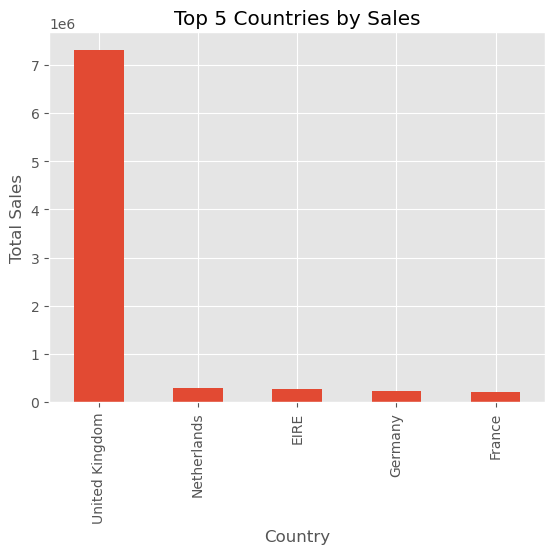

In [ ]:
# 국가별 매출 TOP 5 시각화
top_countries.plot(kind="bar", title="Top 5 Countries by Sales")
plt.ylabel("Total Sales")
plt.show()

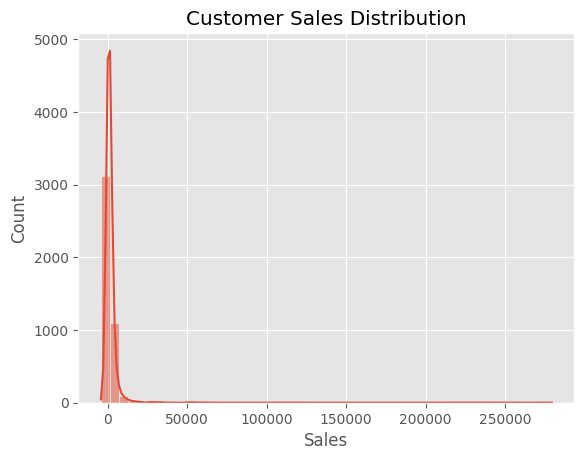

In [16]:
# 고객별 매출 분포
customer_sales = df.groupby("CustomerID")["Sales"].sum()
sns.histplot(customer_sales, bins=50, kde=True)
plt.title("Customer Sales Distribution")
plt.show()

# 4. 신뢰구간 (Confidence Interval)

- 고객 1명당 평균 매출액이 얼마인지, 모집단 평균을 95% 신뢰수준에서 추정해 볼까?

In [17]:
# 표본 평균, 표준편차, n
xbar = customer_sales.mean()    # 표본평균
s = customer_sales.std()    # 표준편차
n = len(customer_sales) # 데이터 개수
se = s / np.sqrt(n) # 표준오차

In [18]:
# 95% 신뢰구간
alpha = 0.05
tcrit = stats.t.ppf(1 - alpha/2, df=n-1)
ci_low, ci_high = xbar - tcrit*se, xbar + tcrit*se

In [20]:
print(f"Sample Mean: {xbar:.2f}")
print(f"95% CI: ({ci_low:.2f}, {ci_high:.2f})")

Sample Mean: 1898.46
95% CI: (1654.75, 2142.17)


In [24]:
# 95% 신뢰구간 (데이터가 많아서... 자유도 n인 경우와 비슷)
alpha = 0.05
tcrit = stats.t.ppf(1 - alpha/2, df=n)
ci_low, ci_high = xbar - tcrit*se, xbar + tcrit*se

print(f"Sample Mean: {xbar:.2f}")
print(f"95% CI: ({ci_low:.2f}, {ci_high:.2f})")

Sample Mean: 2053.79
95% CI: (1786.28, 2321.31)


# 5. 가설검정

## (1) t-test: 영국 vs 독일 고객 매출 비교
### “영국 고객과 독일 고객의 평균 매출액이 차이가 있는지 궁금한데?”
- H₀: 두 국가 평균 매출은 동일하다.
- H₁: 두 국가 평균 매출은 다르다.
### 근데 t-test는 사용할 때 조건이 좀 있음...

## 조건1. 정규성 검정(둘 다 정규분포를 따라야함)

- 검증1. 그냥 히스토그램 그려보기 -> 이건 이미 위에서 그림
- 검증2. Shapiro-Wilk 정규성 검정
- 검증3. Q-Q Plot 시각화

### 검증2. 샤피로-윌크 검증

In [22]:
uk_sales = customer_sales[df.loc[df["Country"]=="United Kingdom","CustomerID"].unique()]

uk_sales

CustomerID
17850.0    5288.63
13047.0    3079.10
13748.0     948.25
15100.0     635.10
15291.0    4596.51
            ...   
15471.0     469.48
13436.0     196.89
15520.0     343.50
13298.0     360.00
14569.0     227.39
Name: Sales, Length: 3950, dtype: float64

In [ ]:
stat, p = stats.shapiro(uk_sales)
print("Shapiro-Wilk Test")
print("Statistic =", stat, " p-value =", p)

Shapiro-Wilk Test
Statistic = 0.15735228240281485  p-value = 1.4198113413835694e-85


### 검증3. Q-Q Plot 시각화

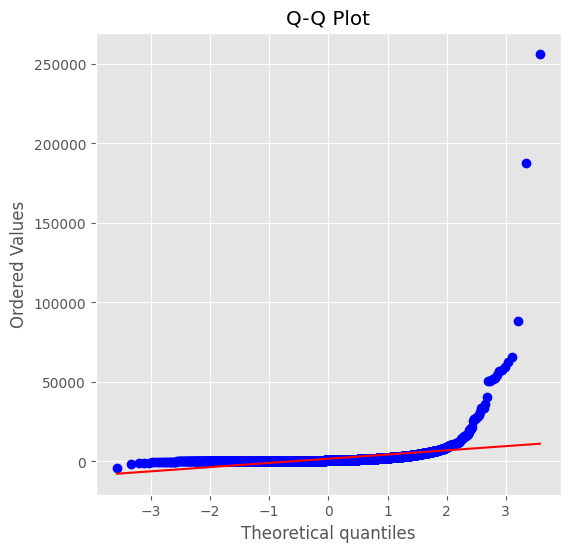

In [23]:
# Q-Q Plot 시각화
plt.figure(figsize=(6, 6))
stats.probplot(uk_sales, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

Shapiro-Wilk Test
Statistic = 0.6735298235574414  p-value = 3.7788440549914706e-13
정규성이 깨졌다고 볼 수 있음 (귀무가설 기각)


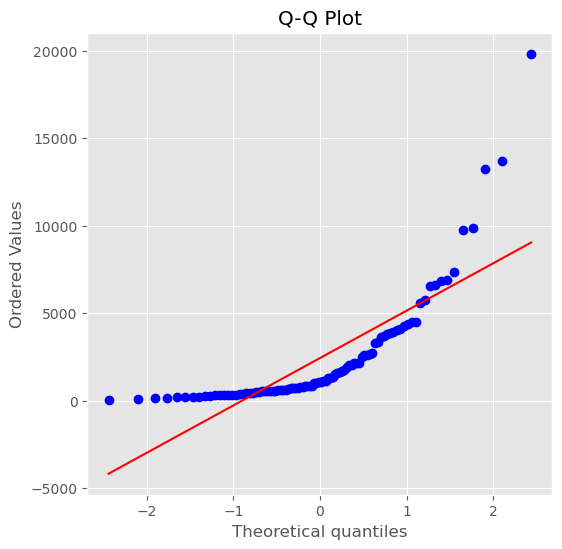

In [30]:
de_sales = customer_sales[df.loc[df["Country"]=="Germany","CustomerID"].unique()]

# Shapiro-Wilk 정규성 검정
stat, p = stats.shapiro(de_sales)
print("Shapiro-Wilk Test")
print("Statistic =", stat, " p-value =", p)

if p > 0.05:
    print("정규성을 만족한다고 볼 수 있음 (귀무가설 기각 불가)")
else:
    print("정규성이 깨졌다고 볼 수 있음 (귀무가설 기각)")

# Q-Q Plot 시각화
plt.figure(figsize=(6, 6))
stats.probplot(de_sales, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

## 조건2. 등분산성 검정
- 검증1. Levene 검정 (정규성 가정 불필요) -> 보편적으로 많이 사용

- 검증2. Bartlett 검정 (정규성 가정 필요)

- 다만 어느 방법을 쓰더라도 적극적으로 등분산성이다라고 주장할 수 없음을 유의

In [31]:
# Levene 검정 (권장)
stat, p = stats.levene(uk_sales, de_sales)
print("Levene Test: stat =", stat, ", p-value =", p)

Levene Test: stat = 0.2221738300952249 , p-value = 0.63741416045265


In [32]:
if p > 0.05:
    print("등분산 가정 OK (일반 t-test 사용 가능)")
else:
    print("등분산 가정 깨짐 (Welch’s t-test 권장)")

등분산 가정 OK (일반 t-test 사용 가능)


In [33]:
# Bartlett 검정 (정규성 가정 필수)
stat_b, p_b = stats.bartlett(uk_sales, de_sales)
print("\nBartlett Test: stat =", stat_b, ", p-value =", p_b)

if p > 0.05:
    print("등분산 가정 OK (일반 t-test 사용 가능)")
else:
    print("등분산 가정 깨짐 (Welch’s t-test 권장)")


Bartlett Test: stat = 77.80409000647045 , p-value = 1.1378431311307388e-18
등분산 가정 OK (일반 t-test 사용 가능)


- **다중검정의 함정** -> 가설검정을 여러번 하게 되면 -> 1종 오류 발생할 확률이 늘어나게됨 -> 정규성 검정 생략

- 카메라 1개 안걸리는 거 vs 카메라 10개 안걸리는거

## T-test vs Welch's T-test

- Student’s t-test: 두 집단의 분산이 같다고 가정할 때 사용 (equal_var=True)

- Welch’s t-test: 두 집단의 분산이 같지 않을 때 사용 (equal_var=False)

- 분산이 같은 상황에서 Welch t-test를 사용하는 것은 크게 문제가 되지는 않음 -> 대신 약간 보수적으로 검정해서 검정력의 손실이 발생 가능

- 물론, Student던 Welch던 정규성은 있어야 함



### Student??
- 1908년에 윌리엄 고셋이 Student라는 필명으로 재발견 (사실, 로베르트 힐메르트가 1875년에, 야코프 뤼로트가 1876년에 이미 발견함)
- 참고로 왜 고셋이 필명을 썼냐면 -> 양조 공장에서 보리의 질을 테스트할 때 사용했는데, 경쟁사들에게 이 통계 기법을 알리고 싶지 않아서

In [34]:
# equal_var = True이면 일반적인 t-test
tstat, pval = stats.ttest_ind(uk_sales, de_sales, equal_var=True)
print("t-test: UK vs Germany")
print("t-statistic =", tstat, "p-value =", pval)


t-test: UK vs Germany
t-statistic = -0.7379664913027232 p-value = 0.460577962081931


In [ ]:
# equal_var = False이면 Welch's t-test
tstat, pval = stats.ttest_ind(uk_sales, de_sales, equal_var=False)
print("t-test: UK vs Germany")
print("t-statistic =", tstat, "p-value =", pval)

t-test: UK vs Germany
t-statistic = -1.596135378174358 p-value = 0.11313801673343721


## 비모수 검정
- 사실, 정규성 검정도 어디까지나 가설검정이니 적극적으로 결과를 확신 X
- 정규성 검정을 진행한 후 또 t-test 같은 가설검정을 해야 하니 검정 다중성 문제 존재
- 아베 마사토(데이터 분석, 수리모형 해석 장인) 말씀하시기를... -> "데이터가 정규분포에서 얻어졌는지 여부를 조사하는 가장 좋은 방법은 없다고 해도 좋다"
    - 따라서, 데이터가 많으면 정규성 안보고 바로 t-test 진행하기도 (중심극한정리)
    - 그렇다면, 데이터가 적거나 극단적인 꼬리 분포 같은 경우는?? 
- 비모수 검정이란? 정규성이 없는경우에 사용할 수 있는 검정 -> 그래서 많이 사용
- 그렇다면 무조건 비모수 검정 사용해도 되는거 아닌가?
    - 표본이 작을 때는 t-test 보다 비모수 검정의 검출력이 낮음 -> 실제 차이가 있어도 못잡을 수 있다
    - t-test는 평균 차이를 직접적으로 해석 가능 (두 집단 평균 차이가 유의미 하다) / 반면에 비모수 검정은 두 집단의 위치 차이를 보고 간접적으로 해석 (두 분포의 위치가 다르다)
- 가장 대표적인 것이 윌콕슨 순위합 검정
    - 평균값 대신 각 데이터 값의 순위(크기 순으로 나열했을 때 몇번째?)에 기반하여 검정을 실시
    - 단, 두개의 모집단 분포(분산)가 같다고 여겨질 때 사용

### (다시 리마인드) “영국 고객과 독일 고객의 평균 매출액이 차이가 있는지 궁금한데?”
- H₀: 두 국가 평균 매출은 동일하다.
- H₁: 두 국가 평균 매출은 다르다.

In [36]:
stat, pval = stats.mannwhitneyu(uk_sales, de_sales, alternative='two-sided') #-> 'two-sided'는 두개의 그룹이 차이 있는지 검정할 때 사용


print("Wilcoxon rank-sum test (Mann-Whitney U)")
print("Statistic:", stat)
print("p-value:", pval)


Wilcoxon rank-sum test (Mann-Whitney U)
Statistic: 136425.0
p-value: 1.636912782799491e-05


### 해석
p-value = 1.63e-05 ≈ 0.000016
→ 매우 작음 (0.05, 0.01, 0.001보다도 훨씬 작음)

따라서 귀무가설 기각

결론 : 영국 고객과 독일 고객의 매출 분포에는 유의미한 차이가 있다.

### 비즈니스 해석
“영국 고객과 독일 고객은 평균 매출액에 있어서 유의미한 차이가 있다.”

따라서 두 국가에 동일한 마케팅 전략 혹은 프로모션 전략을 쓰는 것은 비효율적일 수 있음 → 영,독 국가 맞춤형 접근 필요

## (2) 카이제곱 검정

### "국가와 고객 세그먼트간의 관계가 있을까?"
- H₀ (귀무가설): 국가(Country)와 고객 세그먼트(High/Low)는 독립이다. (즉, 국가와 상관없이 High/Low 고객 비율은 같다)
- H₁ (대립가설): 국가와 고객 세그먼트는 독립이 아니다. (즉, 국가마다 High/Low 고객 비율이 다르다)


## 카이제곱 이란?

- 범주형 데이터에 적용할 수 있는 가설검정
- 원래 범주형 변수가 2개만 있는 경우 -> 이항검정
- 범주형 변수가 여러개 존재하는 경우 -> 카이제곱 (이항검정의 일반화된 형태)
- (실제 출현도수 - 기대도수)^2 / 기대도수를 계산하여 검정
    - 실제 출현도수 = 데이터에서 실제로 관찰된 빈도수
    - 기대도수 = 행의비율 x 열의비율 x 전체 데이터 개수 

## 카이제곱 검정의 유형 두가지

- 적합성 검정

    - 데이터와 모집단의 확률분포를 비교
        - ex) 내가 던진 주사위의 눈이 이산확률분포를 따를까?

- 독립성 검정

    - 두 개의 변수간의 관계를 비교
        - ex) 성별과 취미간의 관계가 있을까?

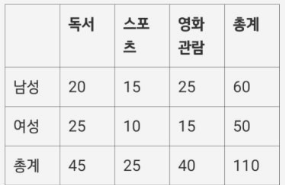

In [37]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [24]:
# 고객별 총매출과 대표 국가
cust_sales = df.groupby('CustomerID')['Sales'].sum()
cust_country = (df.groupby('CustomerID')['Country']
                  .agg(lambda x: x.mode().iat[0] if not x.mode().empty else x.iloc[0])) 
# -> 만약 최빈값이 존재하면 최빈값 중 첫번째 값을 가져오고 만약 최빈값 없으면 그냥 첫번째 값 가져오기

In [39]:
cust_sales

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: Sales, Length: 4339, dtype: float64

In [40]:
cust_country

CustomerID
12346.0    United Kingdom
12347.0           Iceland
12348.0           Finland
12349.0             Italy
12350.0            Norway
                ...      
18280.0    United Kingdom
18281.0    United Kingdom
18282.0    United Kingdom
18283.0    United Kingdom
18287.0    United Kingdom
Name: Country, Length: 4339, dtype: object

In [26]:
cust = pd.DataFrame({'Country': cust_country, 'Sales': cust_sales})
thr = cust['Sales'].quantile(0.70)
cust['Segment'] = np.where(cust['Sales'] >= thr, 'High', 'Low')

In [27]:
cust

,Country,Sales,Segment
CustomerID,,,
12346.0,United Kingdom,0.00,Low
12347.0,Iceland,4310.00,High
12348.0,Finland,1797.24,High
12349.0,Italy,1757.55,High
12350.0,Norway,334.40,Low
...,...,...,...
18280.0,United Kingdom,180.60,Low
18281.0,United Kingdom,80.82,Low
18282.0,United Kingdom,176.60,Low


In [44]:
topN = 10
top_countries = cust['Country'].value_counts().head(topN).index
tab = pd.crosstab(cust.loc[cust['Country'].isin(top_countries), 'Country'],
                  cust.loc[cust['Country'].isin(top_countries), 'Segment'])

In [45]:
tab

Segment,High,Low
Country,,
Belgium,11,13
Finland,5,7
France,30,57
Germany,42,52
Italy,5,9
Norway,7,3
Portugal,7,12
Spain,8,21
Switzerland,11,9


- `pd.crosstab()`은 행(row) × 열(column) 의 빈도수를 집계해주는 함수
    - 행(row): Country (국가)
        - cust['Country'].isin(top_countries) : 상위 국가 목록(top_countries) 안에 속하는 고객만 필터링
    - 열(column): Segment (고객 세그먼트, 예: High / Low)
    - 즉, 국가별로 High 고객 수와 Low 고객 수가 몇 명인지 세어주는 교차표만들려고 한 것!

In [46]:
chi2, pval, dof, expected = stats.chi2_contingency(tab)
print("χ² (Country × High/Low):", chi2, "p:", pval, "dof:", dof)
print("Expected min:", expected.min())

χ² (Country × High/Low): 30.622522709187837 p: 0.00034355334732547174 dof: 9
Expected min: 2.978723404255319


In [47]:
expected

array([[   7.14893617,   16.85106383],
       [   3.57446809,    8.42553191],
       [  25.91489362,   61.08510638],
       [  28.        ,   66.        ],
       [   4.17021277,    9.82978723],
       [   2.9787234 ,    7.0212766 ],
       [   5.65957447,   13.34042553],
       [   8.63829787,   20.36170213],
       [   5.95744681,   14.04255319],
       [1167.95744681, 2753.04255319]])

- 카이 통계량
- p값 -> 0.05이하이기 때문에 유의수준 5%에서 귀무가설 기각 -> 국가별 High/Low 고객 비율에는 통계적으로 유의미한 차이가 있다
- 자유도 -> $(행개수 - 1) * (열개수 - 1) = (10 - 1 ) * (2 - 1) = 9$
- 최소 기대빈도 -> 너무 작으면 신뢰도가 떨어짐 통상적으로 5 이상이 바람직 -> p값이 아주 작아서 전체적으로 유의미하지만 일부 국가는 샘플이 적어서 왜곡 가능성이 존재 -> 희박한 국가를 빼거나 묶어나 해야 할 듯...

### 비즈니스 해석
- 통계적 결론 : “국가별로 High 고객 비율이 다르다.”

- 마케팅 전략적 결론:

    - 특정 국가에서는 High 고객 비중이 높음 → 프리미엄 상품/고액 고객 관리 집중

    - 다른 국가에서는 Low 고객 비중이 높음 → 신규고객 확대, 기본 프로모션 위주

## (3) ANOVA: 미국, 일본, 프랑스 고객 평균 매출 비교

### “상위 3개 국가(미국, 일본, 프랑스) 고객 평균 매출액에 차이가 있는가?”
- H₀: 세 국가의 평균 매출은 동일하다.

- H₁: 세 국가의 평균 매출 중 적어도 하나는 다르다.

- 방법: 분산분석 (ANOVA)

## 분산분석

- 대표적인게 ANOVA
    - F값 = (평균적인 집단 간 변동) / (평균적인 집단 내 변동)을 계산하여 가설검정을 하는 것이 특징 -> F분포랑 관련 있음
- 하지만 데이터가 정규성을 가질 때 가능

In [48]:
df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [49]:
usa_sales = customer_sales[df.loc[df["Country"]=="USA","CustomerID"].unique()]
jp_sales = customer_sales[df.loc[df["Country"]=="Japan","CustomerID"].unique()]
fr_sales = customer_sales[df.loc[df["Country"]=="France","CustomerID"].unique()]

fstat, pval = stats.f_oneway(usa_sales, jp_sales, fr_sales)
print("ANOVA test (USA, JP, FR)")
print("F-statistic =", fstat, "p-value =", pval)

ANOVA test (USA, JP, FR)
F-statistic = 1.5084905303210823 p-value = 0.2264407061117223


## 다중비교 검정
- 분산분석(ANOVA)은 적어도 한 쌍은 차이가 있다!는 얘기할 수 있어도 어느 쌍에 차이가 있는지 얘기 X -> 그 때 **다중비교 사용**
- 단순히 유의수준을 반복 검정횟수 k로 나누는 본페로니 검정도 있지만 -> 검정력이 낮다는 단점
- 일반적으로는 본페로니 검정보다 우수한 **튜키 검정(Tukey's test)** 을 사용

In [50]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

values = np.concatenate([usa_sales, jp_sales, fr_sales])

labels = (["USA"] * len(usa_sales)) + (["JP"] * len(jp_sales)) + (["FR"] * len(fr_sales))

tukey = pairwise_tukeyhsd(values, labels, alpha=0.05)

print("\nTukey HSD 결과")
print(tukey)


Tukey HSD 결과
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
    FR     JP   2274.471 0.2825 -1269.3427 5818.2846  False
    FR    USA -1507.4778 0.7454 -6412.5428 3397.5873  False
    JP    USA -3781.9487 0.2803 -9655.8864 2091.9889  False
-----------------------------------------------------------


### Tukey 검정 결과 해석하기
- meandiff : 두 집단 평균 차이 (group2 - group1)
- p-adj : 보정된 p-value
- lower, upper : 평균 차이의 95% 신뢰구간
- reject : 귀무가설(두 집단 평균 동일)을 기각할지 여부

In [51]:
# 데이터프레임 이용해서 코드 사용하기
df_tukey = pd.DataFrame({
    "sales": np.concatenate([usa_sales, jp_sales, fr_sales]),
    "group": (["USA"] * len(usa_sales)) + (["JP"] * len(jp_sales)) + (["FR"] * len(fr_sales))
})

tukey = pairwise_tukeyhsd(df_tukey["sales"], df_tukey["group"], alpha=0.05)

print("\nTukey HSD 결과")
print(tukey)


Tukey HSD 결과
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
    FR     JP   2274.471 0.2825 -1269.3427 5818.2846  False
    FR    USA -1507.4778 0.7454 -6412.5428 3397.5873  False
    JP    USA -3781.9487 0.2803 -9655.8864 2091.9889  False
-----------------------------------------------------------


### 해석
- “세 국가 고객의 평균 매출액은 비슷하다.”

    - 국가별 차이는 통계적으로 증명되지 않았음.

    - 즉, 국가에 따라 매출액이 달라진다고 일반화할 수 없음.

- 실제 차이가 없다는 뜻은 아님.

    - 표본이 적거나 분산이 크면 → 검정력이 부족해서 유의하지 않게 나올 수 있음.

    - 즉, “차이가 존재하지 않는다”가 아니라, “차이가 있다고 말할 증거가 부족하다”로 해석

### 비즈니스 해석
- 세 국가를 "매출 수준이 다른 집단"으로 구분할 근거는 약하다.

- 따라서 마케팅 전략을 “국가별 차별화”보다는 “공통 전략”으로 가져가는 게 타당할 수 있음.

## 항상 분산 분석을 사용하고 나서 다중비교 검정을 사용하는 것이 옳을까?

- 다중 분석 중 분산분석의 원리가 다른 경우 분산분석의 결과와 일치하지 않는 경우도.... (분산분석은 의미 X -> 다중 분석은 의미 O)
- 또한, 다중 분석도 하고 분산분석도 하면 다중검정의 문제도 당연히 발생...
- 실용적으로, 앞서 본 본페르니, 튜키 검정에 대해서는 분산 분석과는 다른 원리를 사용하기 때문에 분산 분석을 수행하지 않고 다중비교 검정을 수행해도 문제 없음!